In [1]:
import xgboost
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
os.listdir("../Scikitlearn/Gradient Boosting/rossmann-store-sales")

['.ipynb_checkpoints',
 'rossmann-store-sales.zip',
 'sample_submission.csv',
 'store.csv',
 'test.csv',
 'train.csv']

In [3]:
store_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/store.csv", low_memory=False)
store_df.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
train_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/train.csv", low_memory=False)
train_df.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [5]:
test_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/test.csv", low_memory=False)
test_df.head(20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [6]:
submission_df = pd.read_csv("../Scikitlearn/Gradient Boosting/rossmann-store-sales/sample_submission.csv", low_memory=False)
submission_df.head(20)

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [7]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [8]:
test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [9]:
mtrain_df = train_df.merge(store_df, on="Store", how="left")

In [10]:
mtest_df = test_df.merge(store_df, on="Store", how="left")

In [11]:
numeric_cols= mtrain_df.select_dtypes(np.number)
numeric_cols

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,0,0,0,0,1,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,0,0,0,0,1,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,0,0,0,0,1,870.0,NaN,NaN,0,NaN,NaN


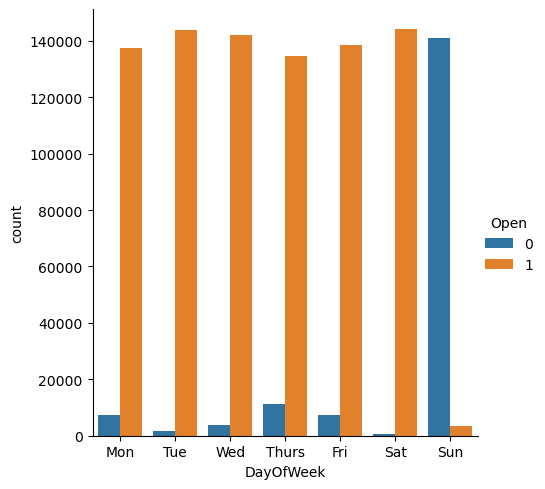

In [12]:
sns.catplot(mtrain_df, x="DayOfWeek", kind="count", hue="Open")
plt.xticks(ticks = list(range(0, 7)), labels=["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

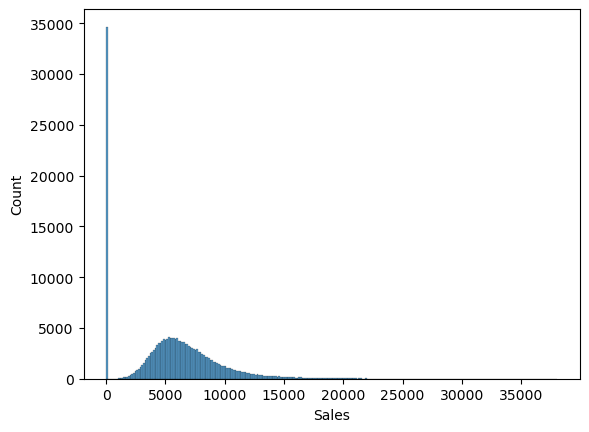

In [13]:
sns.histplot(mtrain_df["Sales"].sample(frac=0.2))

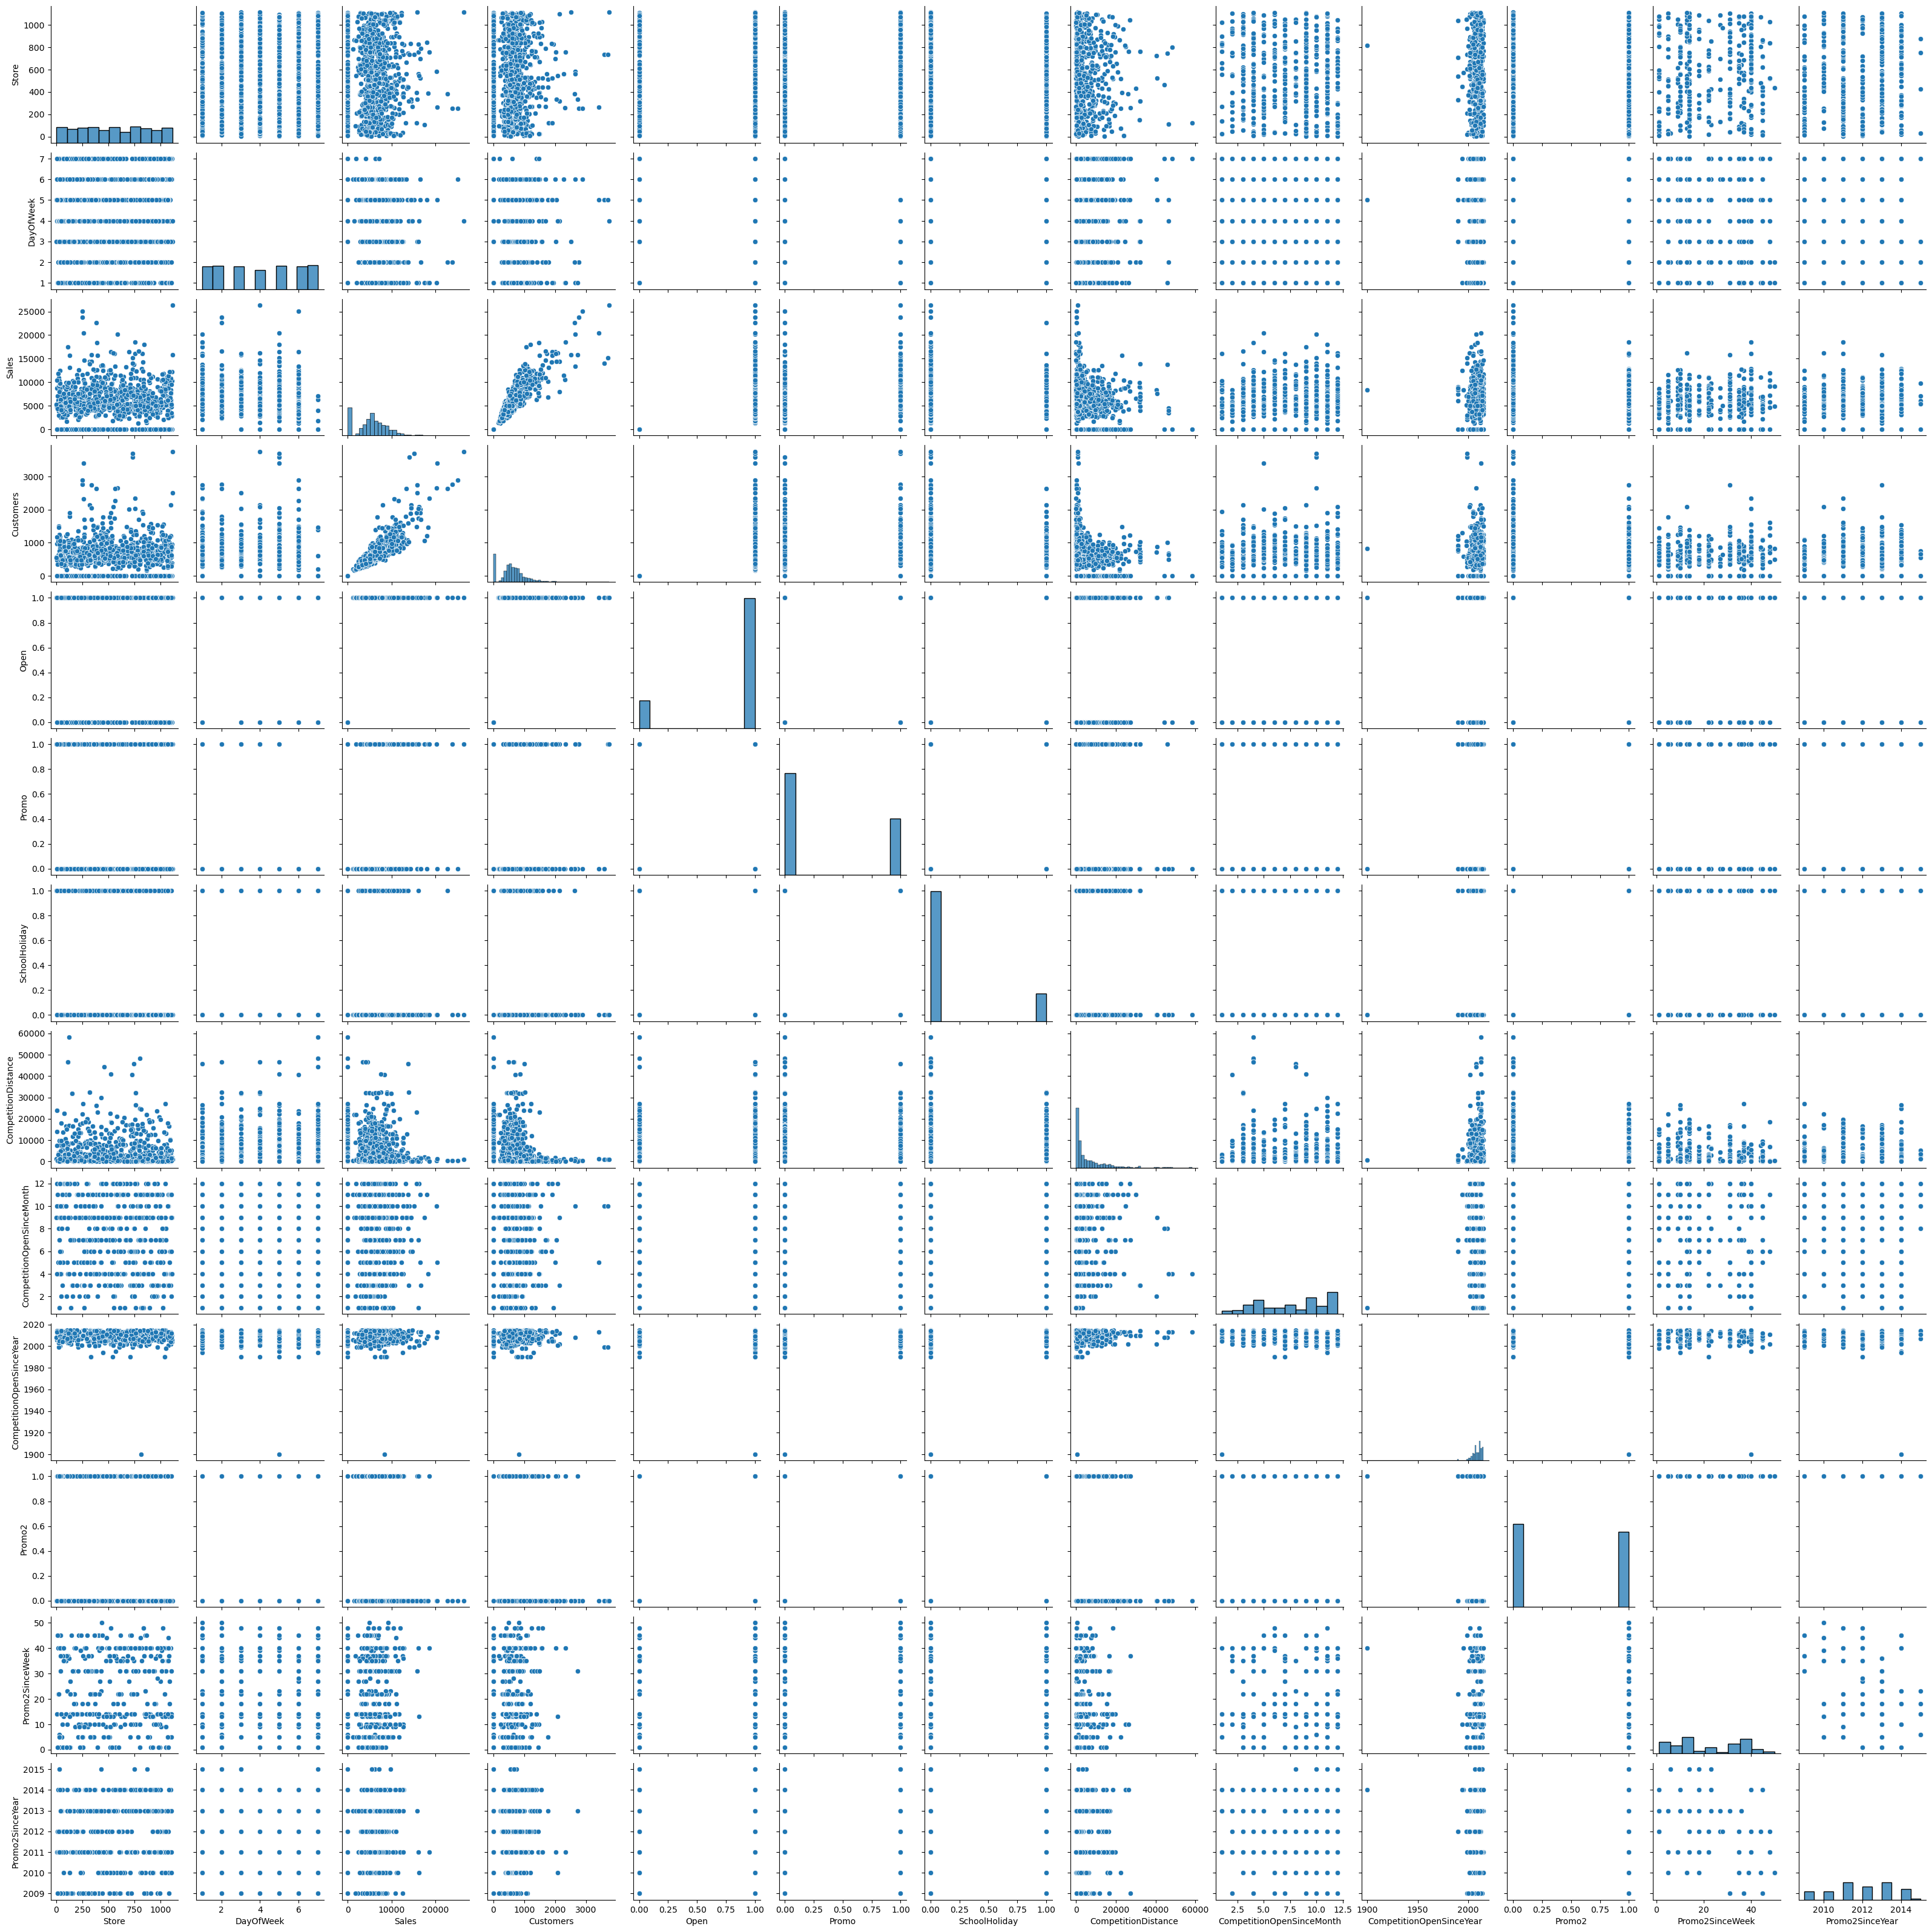

In [14]:
sns.pairplot(mtrain_df.sample(frac=0.001))

In [15]:
def split_date(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Week"] = df.Date.dt.weekday    
    df["Day"] = df.Date.dt.day  
    df["WeekOfYear"] = df.Date.dt.isocalendar().week


In [16]:
split_date(mtrain_df)

In [17]:
split_date(mtest_df)

In [18]:
mtrain_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [19]:
def remove_closed(df):
    df = df[df.Open == 1].copy()

In [20]:
remove_closed(mtrain_df)

In [21]:
remove_closed(mtest_df)

In [22]:
mtrain_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,4,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,4,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,4,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,4,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,4,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,1


In [23]:
mtrain_df[mtrain_df.CompetitionOpenSinceMonth.isna()][["Month", "Sales"]].groupby("Month", as_index=False).mean()

,Month,Sales
0,1,5428.008201
1,2,5623.311609
2,3,5766.610321
3,4,5717.778123
4,5,5485.560932
5,6,5749.455461
6,7,6061.613224
7,8,5663.548288
8,9,5561.707606
9,10,5543.043027


In [24]:
mtrain_df[["CompetitionOpenSinceMonth", "Sales"]].groupby("CompetitionOpenSinceMonth", as_index=False).mean()

,CompetitionOpenSinceMonth,Sales
0,1.0,6172.995021
1,2.0,5429.783060
2,3.0,6018.509804
3,4.0,5721.389568
4,5.0,6253.914209
5,6.0,6355.309018
6,7.0,5605.731231
7,8.0,6242.269193
8,9.0,5674.837021
9,10.0,5672.669411


In [25]:
mtrain_df[~mtrain_df.CompetitionOpenSinceMonth.isna()][["Month", "Sales"]].groupby("Month", as_index=False).mean()

,Month,Sales
0,1,5482.787515
1,2,5655.459859
2,3,5792.937434
3,4,5748.676946
4,5,5491.537451
5,6,5766.318061
6,7,6066.456770
7,8,5706.790911
8,9,5574.237151
9,10,5534.230217


In [26]:
mtrain_df["CompetitionOpenSinceMonth"].nunique()

12

In [27]:
dir(mtrain_df["CompetitionOpenSinceMonth"])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__redu

In [28]:
def competition_month(df):
    df["CompetitionOpen"] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df["CompetitionOpen"] = df["CompetitionOpen"].map(lambda x: 0 if x < 0 else x).fillna(0).astype('int64')

In [29]:
competition_month(mtrain_df)

In [30]:
competition_month(mtest_df)

In [31]:
mtrain_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,4,31,31,82
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,4,31,31,92
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,4,31,31,103
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,4,31,31,70
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,NaN,NaN,NaN,2015,7,4,31,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,1,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,0,NaN,NaN,NaN,2013,1,1,1,1,81
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0,NaN,NaN,NaN,2013,1,1,1,1,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0,NaN,NaN,NaN,2013,1,1,1,1,0


In [32]:
months_dict = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}
def check_if_promo2month(row):
    try:
        return 1 if (months_dict[row.Month] in (row["PromoInterval"] or "").split(",") and row["Promo2OpenSince"]) else 0
    except:
        return 0

In [33]:
def check_promo_month(df):
    df["Promo2OpenSince"] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek) / 4.345
    df["Promo2OpenSince"] = df["Promo2OpenSince"].map(lambda x: 0 if x < 0 else x).fillna(0) * df["Promo2"]
    df["IsPromo2Month"] = df.apply(check_if_promo2month, axis=1) * df["Promo2"]

In [34]:
check_promo_month(mtrain_df)

In [35]:
check_promo_month(mtest_df)

In [36]:
mtrain_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Week', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2OpenSince', 'IsPromo2Month'],
      dtype='object')

In [37]:
input_cols = ["Store", "DayOfWeek", "Promo", "StateHoliday", "SchoolHoliday", "StoreType",
             "Assortment", "CompetitionDistance", "CompetitionOpen", "Day", "Month", "Year", 
              "WeekOfYear", "Promo2", "Promo2OpenSince", "IsPromo2Month"]
target_col = "Sales"   

In [38]:
inputs = mtrain_df[input_cols].copy()
target = mtrain_df[target_col].copy()

In [39]:
test_inputs = mtest_df[input_cols].copy()

In [40]:
inputs.select_dtypes("object").columns

Index(['StateHoliday', 'StoreType', 'Assortment'], dtype='object')

In [41]:
categorical_cols = ["DayOfWeek", "StateHoliday", "StoreType", "Assortment"]
numeric_cols=inputs.columns[~inputs.columns.isin(categorical_cols)]
numeric_cols

Index(['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2',
       'Promo2OpenSince', 'IsPromo2Month'],
      dtype='object')

In [42]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2642
CompetitionOpen           0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
Promo2                    0
Promo2OpenSince           0
IsPromo2Month             0
dtype: int64

In [43]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
Promo2                  0
Promo2OpenSince         0
IsPromo2Month           0
dtype: int64

In [44]:
inputs[inputs["CompetitionDistance"].isna()]

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2OpenSince,IsPromo2Month
290,291,5,1,0,1,d,a,NaN,0,31,7,2015,31,0,0.00000,0
621,622,5,1,0,1,a,c,NaN,0,31,7,2015,31,0,0.00000,0
878,879,5,1,0,0,d,a,NaN,0,31,7,2015,31,1,29.98389,0
1405,291,4,1,0,1,d,a,NaN,0,30,7,2015,31,0,0.00000,0
1736,622,4,1,0,1,a,c,NaN,0,30,7,2015,31,0,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,0,0,1,a,c,NaN,0,2,1,2013,1,0,0.00000,0
1015858,879,3,0,0,1,d,a,NaN,0,2,1,2013,1,1,0.00000,0
1016385,291,2,0,a,1,d,a,NaN,0,1,1,2013,1,0,0.00000,0
1016716,622,2,0,a,1,a,c,NaN,0,1,1,2013,1,0,0.00000,0


In [45]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [46]:
mtrain_df["CompetitionDistance"].fillna(max_distance * 2, inplace=True)

In [47]:
mtest_df["CompetitionDistance"].fillna(max_distance * 2, inplace=True)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
scaler.fit(inputs[numeric_cols])

MinMaxScaler()

In [50]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [51]:
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])

In [54]:
encoded_cols = list(encoder.get_feature_names_out()) 
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [55]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

In [56]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [57]:
X_train = inputs[numeric_cols.tolist()+ encoded_cols]

In [58]:
X_test = test_inputs[numeric_cols.tolist()+ encoded_cols]

Gradient Boosting is a model that tries to predict a target by getting the average of the targets and hence making a decision trees based on the residuals. This steps is followed many times using A + alpha(d) where A is average and alpha is 0.5 this helps prevent overfitting while d is the decision trees

In [59]:
from xgboost import XGBRegressor

In [60]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=5)

In [61]:
model.fit(X_train, target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [62]:
preds = model.predict(X_train)

In [63]:
from sklearn.metrics import mean_squared_error
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [64]:
rmse(target, preds)

2159.1707321081267

In [65]:
target.min(), target.max()

(0, 41551)

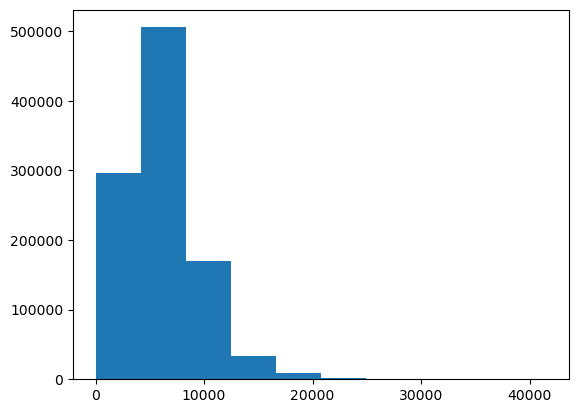

In [66]:
plt.hist(mtrain_df.Sales);

<Axes: >

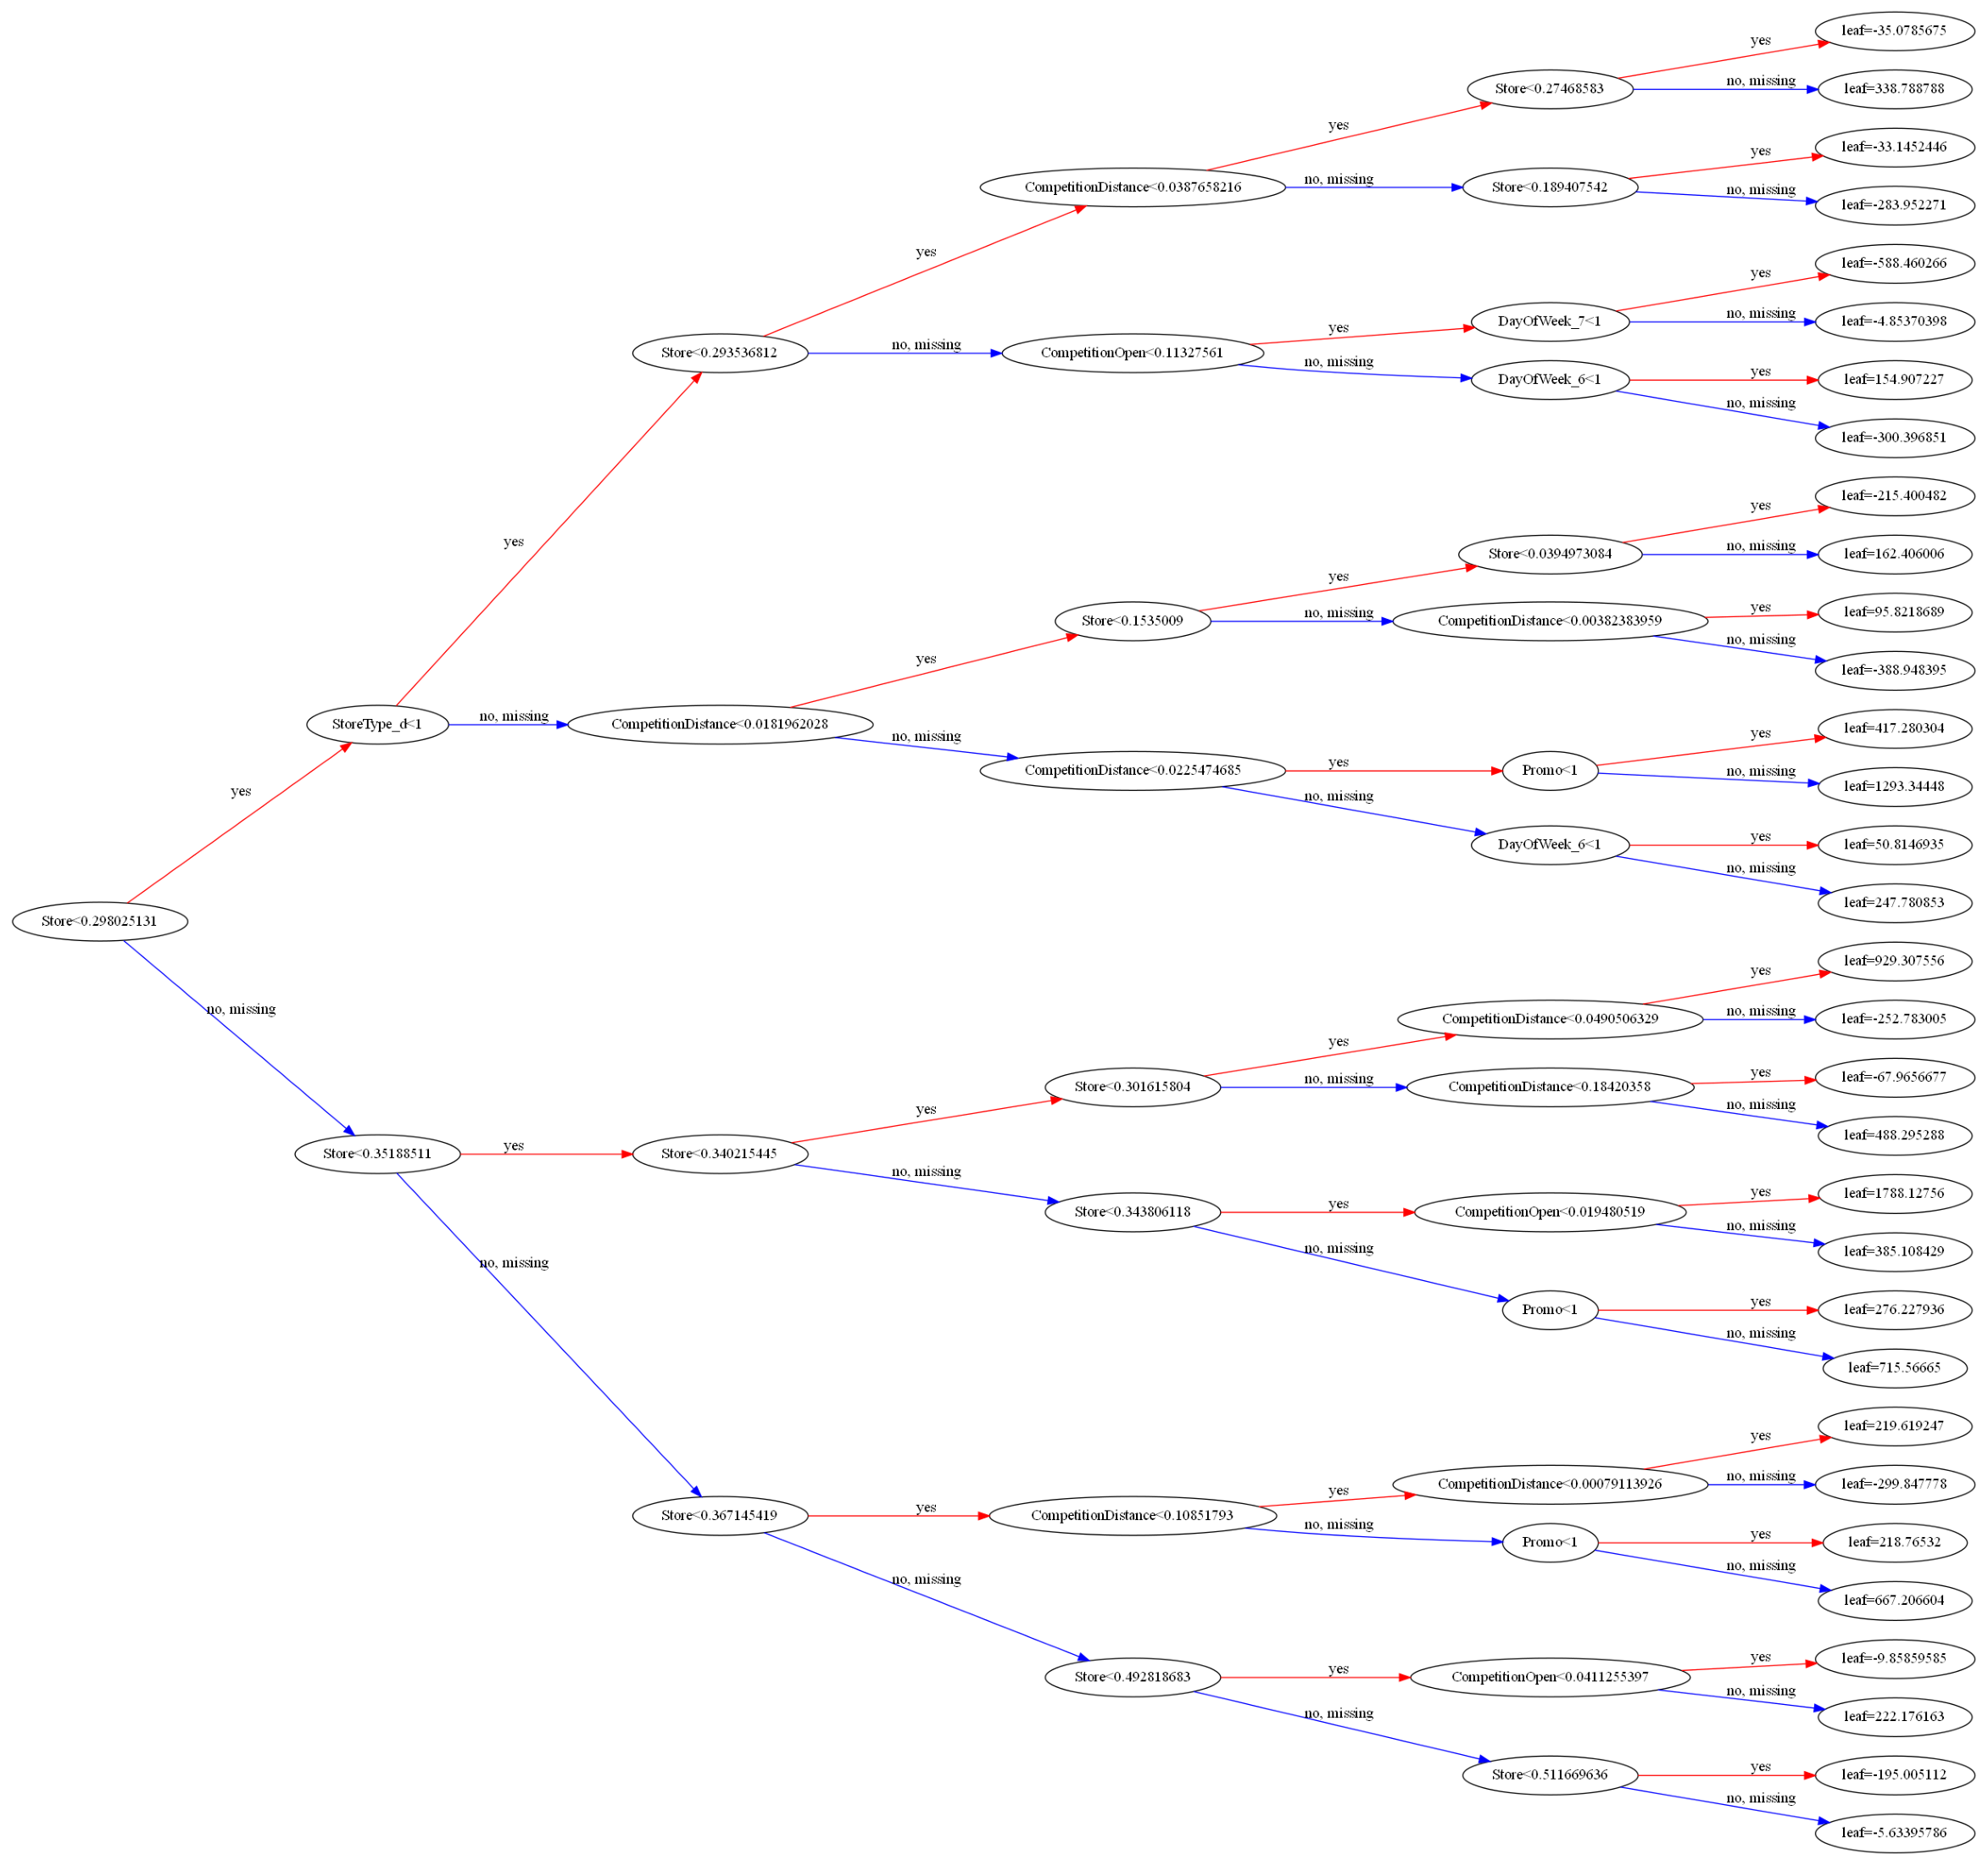

In [67]:
from xgboost import plot_tree
plt.rcParams["figure.figsize"] = 30, 30
plot_tree(model, rankdir='LR', num_trees=19)

In [68]:
trees = model.get_booster().get_dump()

In [69]:
print(trees[0])

0:[DayOfWeek_7<1] yes=1,no=2,missing=2
	1:[StateHoliday_0<1] yes=3,no=4,missing=4
		3:[StoreType_b<1] yes=7,no=8,missing=8
			7:[Day<0.966666639] yes=15,no=16,missing=16
				15:[CompetitionDistance<1] yes=31,no=32,missing=31
					31:leaf=-1712.15613
					32:leaf=-998.467834
				16:[SchoolHoliday<1] yes=33,no=34,missing=34
					33:leaf=-1433.63379
					34:leaf=-1716.97424
			8:[Store<0.235188514] yes=17,no=18,missing=18
				17:[Store<0.0780969486] yes=35,no=36,missing=36
					35:leaf=1461.41223
					36:leaf=5217.03662
				18:[CompetitionDistance<0.00764767919] yes=37,no=38,missing=38
					37:leaf=232.217056
					38:leaf=1812.86304
		4:[Promo<1] yes=9,no=10,missing=10
			9:[Assortment_a<1] yes=19,no=20,missing=20
				19:[CompetitionDistance<0.00448312238] yes=39,no=40,missing=40
					39:leaf=592.33905
					40:leaf=107.039589
				20:[StoreType_b<1] yes=41,no=42,missing=42
					41:leaf=-89.2335129
					42:leaf=1018.5658
			10:[DayOfWeek_1<1] yes=21,no=22,missing=22
				21:[Month<1] yes=43,

In [70]:
importances_df = pd.DataFrame({
    "feature": X_train.columns,
    'weights': model.feature_importances_
})

<Axes: xlabel='weights', ylabel='feature'>

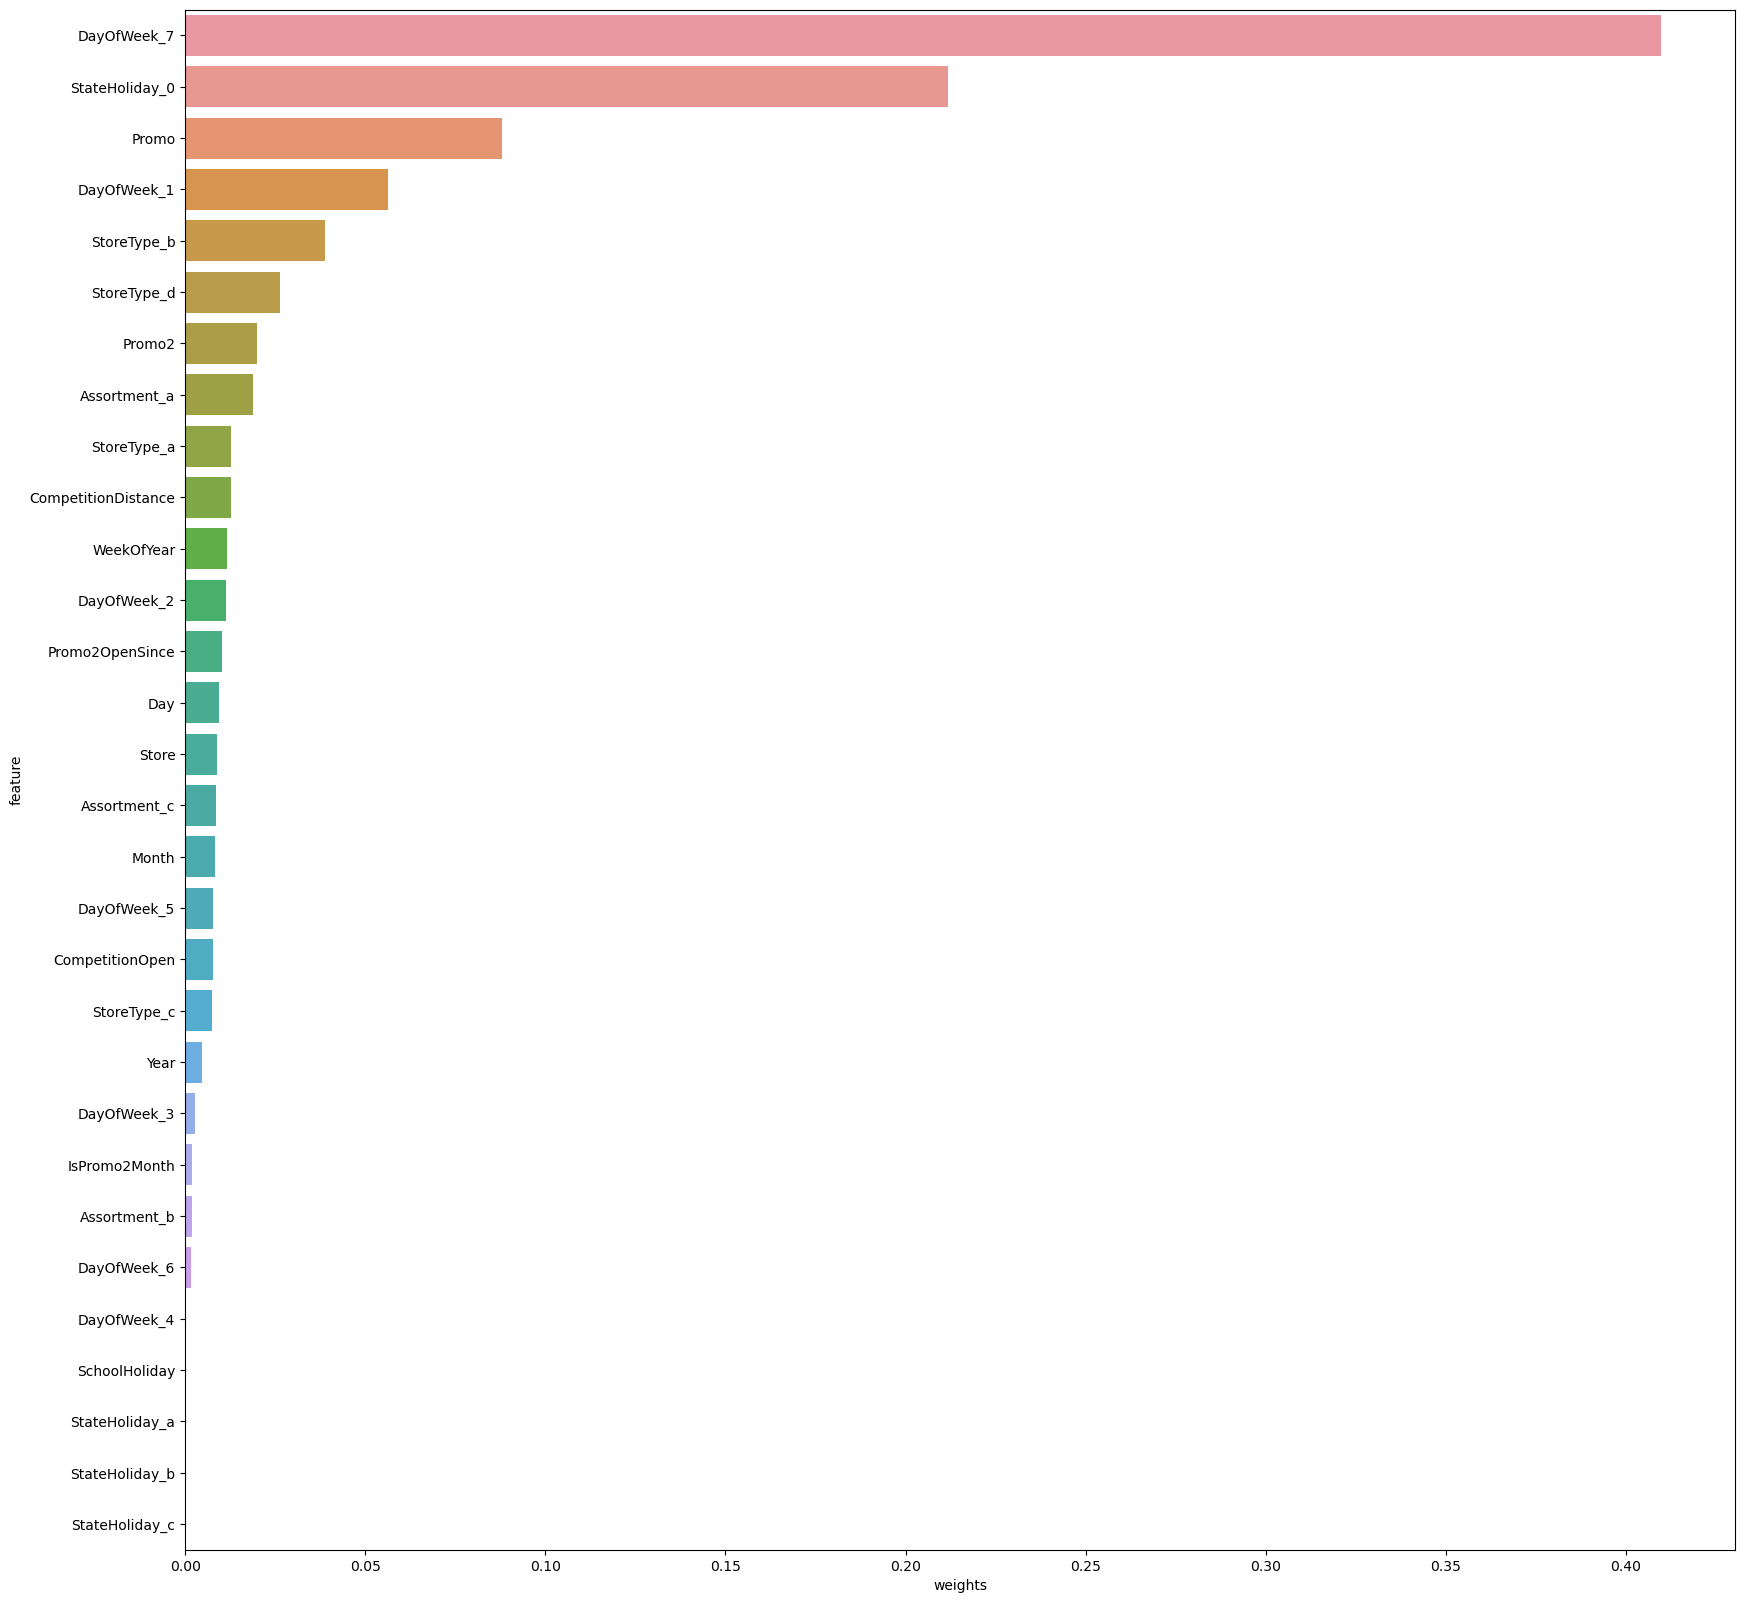

In [71]:
plt.rcParams["figure.figsize"] = 20, 20
sns.barplot(importances_df.sort_values("weights", ascending=False), x="weights", y="feature")

In [72]:
from sklearn.model_selection import KFold
# Note Kfold does not work with large dataset

In [73]:
def train_model(X_train, train_targets, X_val, val_targets, **kwargs):
    model =XGBRegressor(random_state=42, n_jobs=-1, **kwargs)
    model.fit(X_train, train_targets)
    train_rmse = rmse(train_targets, model.predict(X_train,))
    val_rmse = rmse(val_targets, model.predict(X_val))
    return model, train_rmse, val_rmse
    

In [74]:
kfold = KFold(n_splits=5)

In [75]:
models = []
for train_idxs, val_idxs in kfold.split(X_train):
    X, train_targets = X_train.iloc[train_idxs], target.iloc[train_idxs]
    X_val, val_targets = X_train.iloc[val_idxs], target.iloc[val_idxs]
    model, train_rmse, val_rmse = train_model(X, train_targets, X_val, 
                                              val_targets, max_depth=4, n_estimators=20)
    models.append(model)
    print(f"Train RMSE: {train_rmse}, Val RMSE: {val_rmse}")

Train RMSE: 2254.914310415658, Val RMSE: 2296.0215492277675
Train RMSE: 2275.8422182300883, Val RMSE: 2326.040027473648
Train RMSE: 2287.553525261529, Val RMSE: 2238.017656045401
Train RMSE: 2259.23929655889, Val RMSE: 2338.3965455337097
Train RMSE: 2248.063502190894, Val RMSE: 2309.7004154334913


In [76]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [77]:
models[0].predict(X_train) + models[1].predict(X_train) / 2 

array([12645.99   , 11850.816  , 12851.165  , ...,   596.2824 ,
        5242.188  ,  -243.69992], dtype=float32)

In [78]:
preds = predict_avg(models, X_train)

In [79]:
rmse(target, preds)

2260.3283257045487

### HyperParameter Tunning

In [80]:
from sklearn.model_selection import train_test_split
X, X_val, train_targets, val_targets = train_test_split(X_train, target, test_size=0.2)

In [81]:
def train_model(**kwargs):
    model =XGBRegressor(random_state=42, n_jobs=-1, **kwargs)
    model.fit(X, train_targets)
    train_rmse = rmse(train_targets, model.predict(X))
    val_rmse = rmse(val_targets, model.predict(X_val))
    return train_rmse, val_rmse

In [82]:
print(train_model(max_depth=4))

(1757.588939080315, 1759.1446853215218)


In [83]:
train_model(n_estimators=23)

(2018.3859591621629, 2019.6848238472385)

In [84]:
train_model(n_estimators=10)

(2272.4886136219875, 2271.657923566096)

In [85]:
train_model(n_estimators=100)

(1258.876837021591, 1268.3319139629432)

In [86]:
train_model(n_estimators=240)

(959.3454341114912, 979.7176824779708)

In [87]:
train_model(max_depth=10, n_estimators=100)

(676.7493207993216, 770.6861434703793)

In [88]:
# Learning Rate is the alpha applied to the prediction
# A low learning rate will give less weightage to the residuals
# A low learning rate will lead to underfitting while a high learning rate may lead to overfitting
train_model(learning_rate=0.01, n_estimators=30)

(3302.1824383510984, 3289.808767206918)

In [89]:
train_model(learning_rate=0.6, n_estimators=100)

(1059.157285292715, 1078.7765935746895)

In [90]:
train_model(learning_rate=0.6, n_estimators=1000, max_depth=10)

(205.34243356469798, 723.319310569872)

In [91]:
train_model(booster="gblinear")

(2556.7724940630287, 2548.2021589799674)

In [92]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [93]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [108]:
test_preds = model.predict(X_test)

In [109]:
submission_df["Sales"] = test_preds

In [110]:
submission_df["Sales"] = submission_df["Sales"] * test_df.Open.fillna(1.)

In [116]:
submission_df[submission_df["Sales"] == 0]

,Id,Sales
543,544,0.0
676,677,0.0
840,841,0.0
1399,1400,0.0
1532,1533,0.0
...,...,...
40227,40228,-0.0
40228,40229,0.0
40229,40230,0.0
40230,40231,0.0
